In [151]:
# inputs

#path to the .csv file created from the VeTrans output
haps_path = "/Users/e.smith.5/Documents/PhD/RSV_project/RSV_haplotype_reconstruction/data/VeTrans/by_protein/n_haps_F/Inference_14_0.csv"

#path to the Times.in file
times = "/Users/e.smith.5/Documents/PhD/RSV_project/RSV_haplotype_reconstruction/data/samfire/Times.in"

#name of the protein used for plotting
protein_name = "F Protein"


"F Protein"

In [152]:
# load Julia dependencies

using CSV
using DataFrames
using RCall
using Images
using FileIO
using FilePathsBase
using ImageMagick

# load R dependencies
R"""
# Function to set CRAN mirror and ensure R can download packages
chooseCRANmirror(ind=1) # Selects a default CRAN mirror

# Install the devtools package if not already installed
if (!requireNamespace("devtools", quietly = TRUE))
  install.packages("devtools")

# Load the devtools package
library(devtools)

# Install ggplot2 and viridis with dependencies
install.packages(c("ggplot2", "viridis", "tidyverse", "hrbrthemes", "gganimate", "gifski"), dependencies = TRUE)

# Load the packages quietly
suppressPackageStartupMessages({
  library("ggplot2")
  library("viridis")
  library("tidyverse")
  library("hrbrthemes")
  library("gganimate")
  library("gifski")
})
"""


The downloaded binary packages are in
	/var/folders/7v/htx5jcb93rvbnyr12j89csbr0000gp/T//RtmpdE3vwN/downloaded_packages


┌ Warning: RCall.jl: Installing packages into '/Users/e.smith.5/Library/R/arm64/4.4/library'
│ (as 'lib' is unspecified)
│ trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/ggplot2_3.5.1.tgz'
│ Content type 'application/x-gzip' length 4974305 bytes (4.7 MB)
│ ==================================================
│ downloaded 4.7 MB
│ 
│ trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/viridis_0.6.5.tgz'
│ Content type 'application/x-gzip' length 3016921 bytes (2.9 MB)
│ ==================================================
│ downloaded 2.9 MB
│ 
│ trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/tidyverse_2.0.0.tgz'
│ Content type 'application/x-gzip' length 428901 bytes (418 KB)
│ ==================================================
│ downloaded 418 KB
│ 
│ trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/hrbrthemes_0.8.7.tgz'
│ Content type 'application/x-gzip' length 862799 bytes (

RObject{StrSxp}
 [1] "gifski"      "gganimate"   "hrbrthemes"  "lubridate"   "forcats"    
 [6] "stringr"     "dplyr"       "purrr"       "readr"       "tidyr"      
[11] "tibble"      "tidyverse"   "viridis"     "viridisLite" "ggplot2"    
[16] "devtools"    "usethis"     "stats"       "graphics"    "grDevices"  
[21] "utils"       "datasets"    "methods"     "base"       


In [153]:
# load data

haps_wide = CSV.read(haps_path, DataFrame)

# pass into R
@rput haps_wide 

R"""
library(tidyverse)

times <- colnames(haps_wide)[-1]

haps <- haps_wide %>%
  pivot_longer(
    cols = all_of(times),
    names_to = "Time",
    values_to = "Frequency"
  )
"""

# get back haps dataframe

@rget haps

Row,Haplotype,Time,Frequency
,String,String,Float64
1,GGGCCCCCAATAAGCAATAACAAAGG,1,0.000108336
2,GGGCCCCCAATAAGCAATAACAAAGG,29,1.0e-10
3,GGGCCCCCAATAAGCAATAACAAAGG,50,0.000272864
4,GGGCCCCCAATAAGCAATAACAAAGG,74,1.0e-10
5,GGGCCCCCAATAAGCAATAACAAAGG,83,1.0e-10
6,GGGCCCCCAATAAGCAATAACAAAGG,99,2.44527e-5
7,GGGCCCCCAATAAGCAATAACAAAGG,111,1.0e-10
8,GGGCCCCCAATAAGCAATAACAAAGG,119,1.0e-10
9,GGGCCCCCAATAAGCAATAACAAAGG,125,0.0925662


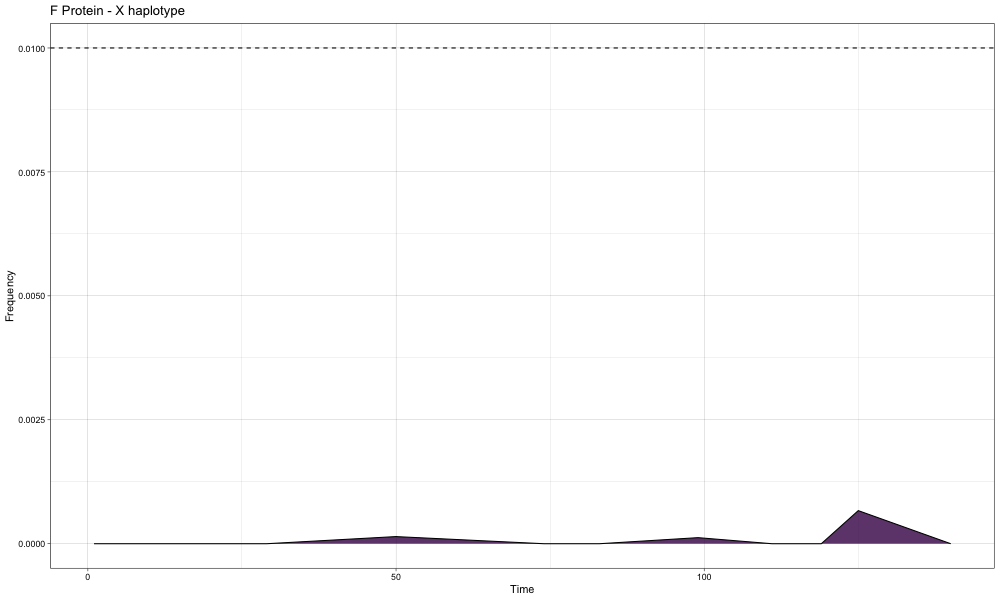

Temporary file deleted successfully.


In [154]:
# plot to check X haplotype frequencies

@rput haps # pass back to R
@rput protein_name

# Set the path for the temporary image file
output_path = joinpath(pwd(), "ggplot_output.png")

# Create the ggplot in R and save it as a PNG file
R"""

p <- haps %>% filter(str_detect(Haplotype, "^X+$")) %>% 
    ggplot(aes(x = as.numeric(Time), y = as.numeric(Frequency), fill = Haplotype)) + 
    geom_area(alpha = 0.8, linewidth = 0.5, colour = "black") +
    geom_hline(yintercept = 0.01, linetype = "dashed", color = "black") +
    theme_linedraw() +
    labs(title = paste(protein_name, "- X haplotype"), x = "Time", y = "Frequency") +
    theme(legend.position = "none") +
    scale_fill_viridis(discrete = TRUE, direction = 1)

png(filename = $output_path, width = 1000, height = 600)
print(p)
dev.off()
"""

# Read and display the image file in Julia
if isfile(output_path)
    img = load(output_path)
    display(img)

    # Delete the temporary image file after displaying
    rm(output_path; force = true)
    println("Temporary file deleted successfully.")
else
    println("File does not exist.")
end

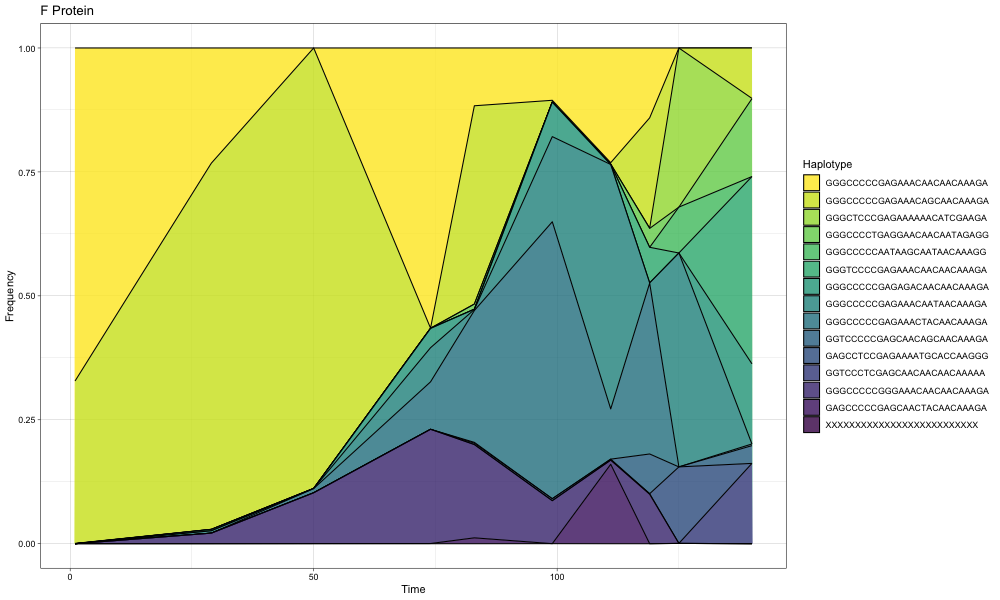

Temporary file deleted successfully.


In [155]:
# plot

@rput haps # pass back to R
@rput protein_name

# Set the path for the temporary image file
output_path = joinpath(pwd(), "ggplot_output.png")

# Create the ggplot in R and save it as a PNG file
R"""
# Sort haplotypes by their initial frequency
first_time_point <- haps %>% 
  filter(Time == min(Time)) %>% 
  arrange(desc(Frequency)) %>% 
  select(Haplotype, InitialFrequency = Frequency)

# Join the initial frequency data back to the main dataset
haps <- haps %>% 
  left_join(first_time_point, by = "Haplotype") %>%
  arrange(desc(InitialFrequency), Time, Frequency)

# Create a color palette with the same number of colors as unique haplotypes
num_haplotypes <- length(unique(haps$Haplotype))
haplotype_colors <- viridis::viridis(num_haplotypes, direction = -1)

# Assign colors based on the order of haplotypes by InitialFrequency
haps$Haplotype <- factor(haps$Haplotype, levels = unique(haps$Haplotype))

# Create the plot
p <- ggplot(haps, aes(x = as.numeric(Time), y = as.numeric(Frequency), fill = Haplotype)) + 
  geom_area(alpha = 0.8, linewidth = 0.5, colour = "black") +
  theme_linedraw() +
  labs(title = protein_name, x = "Time", y = "Frequency") +
  theme(legend.position = "right") +
  scale_fill_manual(values = haplotype_colors)


png(filename = $output_path, width = 1000, height = 600)
print(p)
dev.off()
"""

# Read and display the image file in Julia
if isfile(output_path)
    img = load(output_path)
    display(img)

    # Delete the temporary image file after displaying
    rm(output_path; force = true)
    println("Temporary file deleted successfully.")
else
    println("File does not exist.")
end

In [156]:
using DataFrames
using CSV

# Function to find the consensus haplotype at the minimum time point
function consensus_haplotype(df::DataFrame)
    # Find the minimum time point
    min_time = minimum(df[!, :Time])
    
    # Filter the dataframe for the minimum time point
    filtered_df = filter(row -> row.Time == min_time, df)
    
    # Group by haplotype and sum their frequencies
    grouped_df = combine(groupby(filtered_df, :Haplotype), :Frequency => sum)
    
    # Find the haplotype with the maximum summed frequency
    max_freq_row = grouped_df[argmax(grouped_df[!, :Frequency_sum]), :]
    
    return max_freq_row.Haplotype
end

# Call the function and get the consensus haplotype
consensus = consensus_haplotype(haps)
println("The consensus haplotype at the first time point is: $consensus")

The consensus haplotype at the first time point is: GGGCCCCCGAGAAACAACAACAAAGA


In [157]:
# Function to calculate mismatches
function count_mismatches(haplotype::String, consensus::String)::Union{Int, String}
    mismatches = 0
    for i in 1:length(haplotype)
        if haplotype[i] != consensus[i]
            mismatches += 1
        end
    end
    if mismatches == length(haplotype)
        return "X"
    else
        return mismatches
    end
end

# Add new column with mismatch count
haps.Mismatches = [count_mismatches(row.Haplotype, consensus) for row in eachrow(haps)]

println(haps)

# Group the DataFrame by the 'Mismatches' column
@rput haps
R"""
# Grouping by Time and Mismatches, then summing Frequency
haps_mismatched <- haps %>%
    group_by(Time, Mismatches) %>%
    summarize(Frequency = sum(Frequency), .groups = 'drop')
"""

@rget haps_mismatched

150×4 DataFrame
 Row │ Haplotype                   Time    Frequency    Mismatches 
     │ String                      String  Float64      Any        
─────┼─────────────────────────────────────────────────────────────
   1 │ GGGCCCCCAATAAGCAATAACAAAGG  1       0.000108336  5
   2 │ GGGCCCCCAATAAGCAATAACAAAGG  29      1.0e-10      5
   3 │ GGGCCCCCAATAAGCAATAACAAAGG  50      0.000272864  5
   4 │ GGGCCCCCAATAAGCAATAACAAAGG  74      1.0e-10      5
   5 │ GGGCCCCCAATAAGCAATAACAAAGG  83      1.0e-10      5
   6 │ GGGCCCCCAATAAGCAATAACAAAGG  99      2.44527e-5   5
   7 │ GGGCCCCCAATAAGCAATAACAAAGG  111     1.0e-10      5
   8 │ GGGCCCCCAATAAGCAATAACAAAGG  119     1.0e-10      5
   9 │ GGGCCCCCAATAAGCAATAACAAAGG  125     0.0925662    5
  10 │ GGGCCCCCAATAAGCAATAACAAAGG  140     1.0e-10      5
  11 │ GGGTCCCCGAGAAACAACAACAAAGA  1       1.0e-10      1
  12 │ GGGTCCCCGAGAAACAACAACAAAGA  29      0.00278285   1
  13 │ GGGTCCCCGAGAAACAACAACAAAGA  50      1.00249e-10  1
  14 │ GGGTCCCCGAGAAACAACA

Row,Time,Mismatches,Frequency
,String,Any,Float64
1,1,5,0.000288598
2,1,1,0.327615
3,1,3,2.0e-10
4,1,8,1.0e-10
5,1,4,0.000337723
6,1,0,0.671759
7,1,X,1.0e-10
8,111,5,0.000839678
9,111,1,0.605561


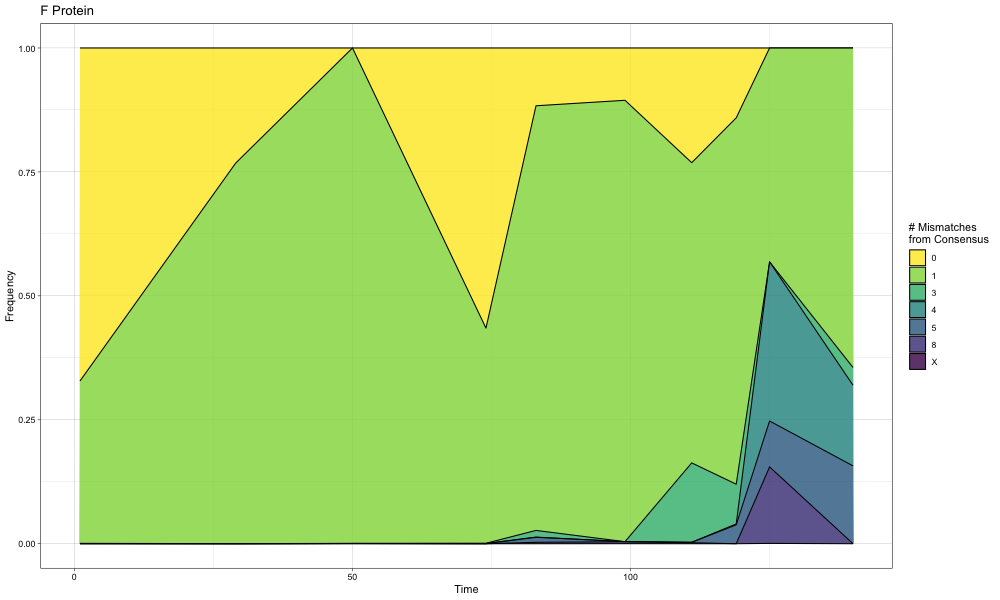

Temporary file deleted successfully.


In [158]:
# area plot for counts of mutations
# plot

@rput haps_mismatched # pass back to R
@rput protein_name

# Set the path for the temporary image file
output_path = joinpath(pwd(), "ggplot_output.png")

# Create the ggplot in R and save it as a PNG file
R"""
# Ensure columns are of correct types
haps_mismatched$Frequency <- as.numeric(unlist(haps_mismatched$Frequency))
haps_mismatched$Mismatches <- as.factor(as.character(unlist(haps_mismatched$Mismatches)))
haps_mismatched$Time <- as.numeric(unlist(haps_mismatched$Time))

p <- haps_mismatched %>% arrange(desc(Time)) %>% 
    ggplot(aes(x = as.numeric(Time), y = Frequency, fill = as.factor(Mismatches))) + 
    geom_area(alpha = 0.8 , linewidth = 0.5, colour = "black") +
    theme_linedraw() +
    labs(title = protein_name, x = "Time", y = "Frequency", fill = "# Mismatches\nfrom Consensus") +
    theme(legend.position = "right") +
    scale_fill_viridis(discrete = TRUE, direction = -1)

png(filename = $output_path, width = 1000, height = 600)
print(p)
dev.off()
"""

# Read and display the image file in Julia
if isfile(output_path)
img = load(output_path)
display(img)

  
# Delete the temporary image file after displaying
rm(output_path; force = true)
println("Temporary file deleted successfully.")
else

println("File does not exist.")

end

In [159]:
# Function to calculate Hamming distance between two strings
function hamming_distance(s1::String, s2::String)::Int
    return sum(c1 != c2 for (c1, c2) in zip(s1, s2))
end

# Function to group and order haplotypes by Hamming distance, starting with the consensus sequence
function group_haplotypes(strings::Vector{String}, consensus::String)
    # Ensure all strings are of the same length as the consensus sequence
    if any(length(s) != length(consensus) for s in strings)
        error("All strings must be the same length as the consensus sequence")
    end
    
    # Remove the consensus sequence from the list of strings if present
    remaining_strings = setdiff(strings, [consensus])
    
    # Initialize groups with the consensus sequence starting each group
    groups = [[consensus]]
    
    # Function to find the closest string to a given string from a list
    function find_closest_string(s::String, candidates::Vector{String})
        distances = [(candidate, hamming_distance(s, candidate)) for candidate in candidates]
        sorted_candidates = sort(distances, by=x -> x[2])
        return [c[1] for c in sorted_candidates if c[2] == sorted_candidates[1][2]]
    end
    
    # Build groups by progressively adding sequences with the smallest possible Hamming distance
    while !isempty(remaining_strings)
        # Get the last sequence in the current group
        current_group = last(groups)
        last_sequence = last(current_group)
        
        # Find the closest sequences to the last sequence
        closest_sequences = find_closest_string(last_sequence, remaining_strings)
        
        # If there are multiple closest sequences, create branches
        for seq in closest_sequences
            new_group = current_group[1:end] # Clone the current group
            push!(new_group, seq)
            push!(groups, new_group)
            deleteat!(remaining_strings, findfirst(x -> x == seq, remaining_strings))
        end
    end
    
    # Return the list of groups
    return groups
end


# Extracting the Haplotype column as a list
haplotype_list = haps.Haplotype

# Filtering out entries that consist entirely of Xs
filtered_haplotype_list = filter(x -> !(all(c -> c == 'X', x)), haplotype_list)

# Establish consensus at time 0
consensus = consensus_haplotype(haps)

# Group by Hamming distance
groups = group_haplotypes(filtered_haplotype_list, consensus)

# Merge groups where one group is a subset of another
function merge_groups(groups)
    merged_groups = []
    
    # Sort groups by length (longest first) to prioritize larger groups during merging
    sorted_groups = sort(groups, by = length, rev = true)
    
    for group in sorted_groups
        merged = false
        for i in 1:length(merged_groups)
            if all(g -> g in merged_groups[i], group)
                merged_groups[i] = union(merged_groups[i], group)
                merged = true
                break
            end
        end
        if !merged
            push!(merged_groups, group)
        end
    end
    
    return merged_groups
end

# Merge groups where one group is a subset of another
merged_groups = merge_groups(groups)

# Initialize an empty DataFrame
grouped_haps = DataFrame(Group = String[], Haplotype = String[])

# Iterate over the grouped vector and populate the DataFrame
for (i, group) in enumerate(merged_groups)
    println("Processing Group $i: ", group)  # Debugging line
    for haplotype in group
        push!(grouped_haps, (string("Group_", i), haplotype))
    end
end

# Apply the function to calculate Hamming distance and create the new column
grouped_haps.ham_dist = [hamming_distance(row.Haplotype, consensus) for row in eachrow(grouped_haps)]

# Convert Julia DataFrames to R dataframes
@rput grouped_haps
@rput haps_wide

# Use Tidyverse in R to join the dataframes by `Haplotype`
R"""
library(dplyr)

# Ensure Haplotype columns are of the same type (if not already)
grouped_haps <- grouped_haps %>% mutate(Haplotype = as.character(Haplotype))
haps <- haps %>% mutate(Haplotype = as.character(Haplotype))

# Join the dataframes on the Haplotype column
grouped_haps <- left_join(grouped_haps, haps, by = "Haplotype")
"""

# Bring the result back to Julia
@rget grouped_haps

Processing Group 1: ["GGGCCCCCGAGAAACAACAACAAAGA", "GGGCCCCCGGGAAACAACAACAAAGA", "GAGCCCCCGAGCAACTACAACAAAGA", "GGTCCCTCGAGCAACAACAACAAAAA", "GGGCTCCCGAGAAAAAACATCGAAGA", "GGGCCCCCAATAAGCAATAACAAAGG"]
Processing Group 2: ["GGGCCCCCGAGAAACAACAACAAAGA", "GGGCCCCCGGGAAACAACAACAAAGA", "GAGCCCCCGAGCAACTACAACAAAGA", "GGTCCCTCGAGCAACAACAACAAAAA", "GGGCTCCCGAGAAAAAACATCGAAGA", "GAGCCTCCGAGAAAATGCACCAAGGG"]
Processing Group 3: ["GGGCCCCCGAGAAACAACAACAAAGA", "GGGCCCCCGGGAAACAACAACAAAGA", "GAGCCCCCGAGCAACTACAACAAAGA", "GGTCCCTCGAGCAACAACAACAAAAA", "GGGCCCCTGAGGAACAACAATAGAGG"]
Processing Group 4: ["GGGCCCCCGAGAAACAACAACAAAGA", "GGGCCCCCGGGAAACAACAACAAAGA", "GGTCCCCCGAGCAACAGCAACAAAGA"]
Processing Group 5: ["GGGCCCCCGAGAAACAACAACAAAGA", "GGGTCCCCGAGAAACAACAACAAAGA"]
Processing Group 6: ["GGGCCCCCGAGAAACAACAACAAAGA", "GGGCCCCCGAGAGACAACAACAAAGA"]
Processing Group 7: ["GGGCCCCCGAGAAACAACAACAAAGA", "GGGCCCCCGAGAAACAATAACAAAGA"]
Processing Group 8: ["GGGCCCCCGAGAAACAACAACAAAGA", "GGGCCCCCGAGAAACAGCAAC

┌ Warning: RCall.jl: Warning in left_join(grouped_haps, haps, by = "Haplotype") :
│   Detected an unexpected many-to-many relationship between `x` and `y`.
│ i Row 1 of `x` matches multiple rows in `y`.
│ i Row 111 of `y` matches multiple rows in `x`.
│ i If a many-to-many relationship is expected, set `relationship =
│   "many-to-many"` to silence this warning.
└ @ RCall /Users/e.smith.5/.julia/packages/RCall/dDAVd/src/io.jl:172


Row,Group,Haplotype,ham_dist,Time,Frequency,Mismatches
,String,String,Int64,String,Float64,Any
1,Group_1,GGGCCCCCGAGAAACAACAACAAAGA,0,1,0.671759,0
2,Group_1,GGGCCCCCGAGAAACAACAACAAAGA,0,29,0.232206,0
3,Group_1,GGGCCCCCGAGAAACAACAACAAAGA,0,50,1.00261e-10,0
4,Group_1,GGGCCCCCGAGAAACAACAACAAAGA,0,74,0.565105,0
5,Group_1,GGGCCCCCGAGAAACAACAACAAAGA,0,83,0.11658,0
6,Group_1,GGGCCCCCGAGAAACAACAACAAAGA,0,99,0.105521,0
7,Group_1,GGGCCCCCGAGAAACAACAACAAAGA,0,111,0.231366,0
8,Group_1,GGGCCCCCGAGAAACAACAACAAAGA,0,119,0.140912,0
9,Group_1,GGGCCCCCGAGAAACAACAACAAAGA,0,125,1.0e-10,0


HTML{String}("<img src=\"data:image/gif;base64,R0lGODlhWAJYAoAAAAAAAAAAACH/C05FVFNDQVBFMi4wAwEAAAAh/gdnaWYuc2tpACH5BAQUAAAALAAAAABYAlgCh////wAAAOfn5+bm5v3lHv7+/v39/dzc3HR0dKOjo3d3d2pqaurq6vr6+vz8/Ojo6Ozs7Pv7++/v7/Ly8vf39/n5+fPz8+np6fj4+PX19fb29u3t7evr6/Hx8bDgUu7u7vT09PDw8PzlHuTk5OXl5e7jHwQEBCUlJQ4ODhMTEyEhITU1NYODg7m5udra2hwcHDk5OeHh4UBAQCcnJysrK0xMTKioqGBgYMPDw1CzjEuek7/iS2XHe23LdXvSbYbWaFa7hl5Jh57cW15Egk9+lU6DlY6Ojl89ehgYGE2KlVJSUkymkVpYkB8fH10zcEVFRXl5eT09PWRkZLa2tjExMcfHx1ZWVl0zatbW1ltbW9LS0ldjkwkJCePj49jY2NTU1IiIiJOTk0ualUlJSXt7ey8vL/7+7q6ursvLy09PT67fTqzcTm5ubp6enouLi9/f37u7u6Ghoc7Ozr+/v/zkHrGxsX9/f1ZnlE5OTv3nHqfeVl9BfkyTlY7ZY5TaYFq+g1hYWNLlRk2OlfXpSEuWlefoRVzBgsrlSHZ2dkyRldjmRe/pRrThUFF4lVRulVZqlE6ujVK2iE2sj1F7lVlckV1TjGDCfllfkVNxlUuikl1WjU2qj15OiVJ0lU2HlV5Qi1F2lVVslV84duDnRGdnZ/3qSpubm5eXl6urq+Li4nFxcbfZ0s7C0r63z3PPc/3vdl2insDny7rS1KampqrcRr7laNDQ0N/yvP3kH53Jvd/X4b+vx9DvwrvM1bXjYeb1yv3+93LJj/n2trjf0bzA07rH1KjiqH61s/bsX5SeumOXof7oM2qFo3FMgYfVhUB0jGW9mOr0tm9pm0SsgmE5bev31crpjL7eLfXkHufiINrpXHJWjGSNoXFflWGznWl8of7nJdvr4/T75//0ldXvpPD63/7//tPh4Mvn3GKpojiMiJbceKfgcG1yn///3tnk5tXortvhIZJ5mWatpO/39Or18iuGgiGAfIy2uufr68/tz+7q7yB/e0oeV5ujv+bd1Aj/AAEIHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qU8jUMPMunCRQhinWLNq3cq1q0ATUazUoMGlTUUHWVJ4Xcu2rdu3LE3AGRiGC5aJX1a8UAu3r9+/gAMflEuQBgIAEeyc4DLDBgAFUAbWaEGQBRg4fAVr3sy5M1LCA6WMAWCqiYsOdlBEaJGiAYAvKDQYxJHZs+3buHO7BC3QzgoAAt4A2GAjwAcDL+oAQCTl4JzauqNLn06dIm8AWawA4HDjxYsaATgA/4BiBTkO59Crq1/PfjpvCSlOAbAyJgYALQEYAHDBZcoJhM+1J+CABG5mwiypuNCCDDNQAMAYhxVwQwAjCBTFDCwAmF6BHHboYVMmBBCACS9IIYBAOMxwQhNgIEEZAG0EYB96H9Zo441OCWBAQW2MhuOPQAbZVAynNPGikEgmqSRPLjwh35JQRinllFRWaeWVWGap5ZZcdunll2CGKeaYZJZp5plopqnmmmy26eabcMaJ0RgK1GnnnXjmqeeefPbp55+ABirooIQWauihiCaq6KKMNuroo5BGuqcqNS4g56VAHvahpZh2WqOmHnLq6agFgtqhqKSmyp6pHKKq6qvTsf9aoKuw1oqbrATSauuunOE6oK68BguYrwICK+yxbxHbnrHINuuVsuwx6+y0WUG7nrTUZruUtephq+23RnFbnbfglhuUuNSRa+66PKE7nbrsxnuTu9LBK++9MtEbnb349tuSvrrx6+/AKAGcm8AEJzySwbghrPDDHjF8m8MQV5yRxLZRXK4DFVCQQQYgWDBBByFI8MEHG0DAwcoQbPCBBBKE0MEEFoCQgQYUNLCjxQRh7JnGwRYQAQYaWBDCBxw8MAAJDzBwcswz12wzzhhU0EAFGFCgAcgij1yyBBAwIAAJAlwAwQcdgKBBBREk7HNnQKvqAAYWSMDAAGVzgLYFGmD/EEEBIxnQAAYZGL1B0nhDEAIIFezM7tucxX1pBBpM8MEFZCueQeM3zV03BwMMwIAEFlDgALiQbyZ5mxFkYDcJF2zQgQYNAC6UARVkEAIEAojeAQWOI5u6ZqujWYEFEAzwwAcguJZVBRMkv3zzxw4vWPFiOqBBCAyQwEAIwLvVugQXDMDBBBjYDqv1gWHvJQUSPCDABhZUoFkBGEwAOgMTOJ8q+4BxX5YcAILkccACp8tNBTpQvg9oQH2YAuBfBFilBTbwgeohoAEt0LZLSdAvFIRSATTwAdH1j0MYCIEAHhACDMTpg30JYZIosIEBbCADwfNQBCwAOgnYr00whIsM/4FUAQmYLwNJMoAFLvCACSQwTUF8yxBt5IAJvOECFshhkhoQggG8AQRaFFMU3TLFDhkABGILAQlcWCULLM+GDirTGNtSRgLRcAAfYGPdrHQB+xUgA6ALgf/ANEe21JE9BQBB0zA4EAMMoEoNeEBBzigADsTxS4VcyyGr44AubuCHBoGAbKYUggkgRAMMeAAIIKilTHplk9KpQA078MSDaAACVBJALQ3SgBKGYJdXcmVXYJkbVKqSlQgZQBiFhAH9MMQAHbAhKINZqSsVYAICgAAbHUI6KTEPIhm4wAWQSM1NVQmaApBAByHSzCgVYADIZAgGIKBKKwmTK8S83wQGEP+CeDpEAOtMUgY2UJEI0JOcUrrnVvIJmGsOQALAjEgHOgAlS16kAkkbJZQUqhWG+sUCAvhARCUSgRPFxAENoAAIJiCBlHGAAUyU39JGQIKZ1nSFF2AAAzhwtlJmAAM6O+kjM9LMC1wySRzNikffAoL5BRQjDNhmSXCXgQ4grXxkY8AGJDCBn1bNahFwgAGQWYACGMABEbgaBrIGgg6A7QJjK9vZJkA7f4JkjxuhQE6lGqSkYmWpbMlANgepEbyCxHMSAJ3oSNe3CCzzI4IjnOUwl80QbO6xGemjR/TKgGn+yK9OAWxXMHABDnh2I47sSANA8IHuVZZxmG0JYu9mPsv/jpQikQyJBh4AgafaCLRNEa1WHLCBB5y2I6K8iAEo0AHQXUACdR0K7ljbO/odNyKlHEkGBtABu5aqmjfapylJcsuJjE9pEECfd6W7ve59TwOxRYguSWKADwhAo58C74cw8IAN3NYjynTICO07Pd9q5XgbKFsLH0IBZ5akAqU1MIGAyxThLoW4D+ArSbqpkB2C7obx5UoEJnA3EC/kmygBAXfXqx4KL8XCSdmnBVbSzoNgQAIrXHBnBmxCwgrknSz2SH3v6yEXKwXGRqFAf0MMEoAO5I8blHBnLPhQqQ60JRDmgJSrY+SkIFm6H8jwSyYKAAyUcAMUCLJnHJCBNLrG/6Iuaep4B9RlpHw5KBQQwJxdogEvCIABq+RQFZXmAiaLpABh23J06nyUO/ukAPG77kmUyMQ3IPRDEHjDEdUcku2CQECMNoqjeVKBdHL6Ixroof1Ye6MHuOaOPnSJA1b231vplzoq1PCksYlmgqS2RrltJAjEeWmVWGAAxZZOqIsyapw0IHan5kgEjKjOgyT3Q9k1yDz1bOiORCB23Q7MsonSbJtgE78ooQAHuJ2Q8n5ovgiZ9kN9bJIOCOCouhn3UMo9EwcwAALhzkgiF9mQAHeIAuJZSAFACueUVOABEoh2X/QtFH7HJM+fTokB9vnJh3CYQzd8CCovkHGUFCAED/9QtGAoHhSLjznlKXEoLSNS4wIBOSINOKhKNDAAfHuG5UBxOUsMwFOJW8ShEKWIkwt05Ylg9AHoJkkkKWprc9qmAQKg+klAKlKLkLlADZ9IU
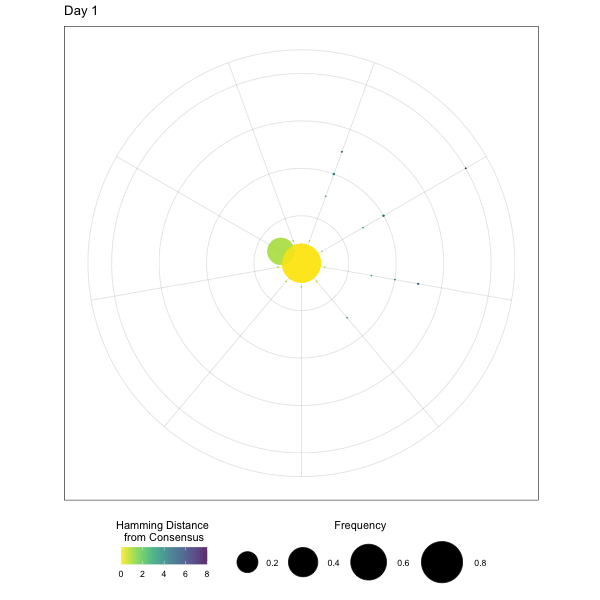

GIF successfully saved at /Users/e.smith.5/Documents/PhD/RSV_project/RSV_haplotype_reconstruction/data/VeTrans/by_protein/n_haps_F/Inference_14_0.gif


In [160]:
# Define the gif_path by replacing .csv with .gif in haps_path
gif_path = replace(haps_path, ".csv" => ".gif")

# Extract the directory name from gif_path
dir_path = dirname(gif_path)

# Ensure the directory exists
if !isdir(dir_path)
    mkpath(dir_path)  # Create the directory if it doesn't exist
end

# Pass the `grouped_haps` dataframe and `gif_path` to R
@rput grouped_haps
@rput gif_path

# Run the R code to create the animation and save it
R"""
# Find the min and max frequency
global_min <- min(grouped_haps$Frequency, na.rm = TRUE)
global_max <- max(grouped_haps$Frequency, na.rm = TRUE)

# Use these in ggplot with consistent size scale
size_limits <- c(global_min, global_max)
size_range <- c(0, 20)

# Create the ggplot
p <- grouped_haps %>%
    ggplot(aes(x = Group, y = as.numeric(ham_dist), color = as.numeric(ham_dist), size = Frequency)) + 
    geom_point() +
    theme_linedraw() +
    labs(title = 'Day {round(frame_time)}', x = "Group", y = "Hamming\nDistance", size = "Frequency", color = "Hamming Distance \nfrom Consensus") +
    guides(size = guide_legend(title.position = "top")) +
    theme(legend.position = "bottom", 
          legend.title = element_text(hjust = 0.5)) +
    guides(colour = guide_colourbar(title.position = "top", title.theme = element_text(hjust = 0.5))) +
    scale_color_viridis(direction = -1, alpha = 0.8) +
    scale_size_continuous(limits = size_limits, range = size_range) +
    coord_polar(theta = "x", start = 0) +
    ylim(0, max(grouped_haps$ham_dist)) +
    theme(axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank()) +
    theme(axis.title.y=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks.y=element_blank()) +
    transition_time(as.numeric(Time)) +
    ease_aes('linear')

# Render the animation as a GIF
anim <- animate(p, renderer = gifski_renderer(), width = 600, height = 600, fps = 5,)

# Save the GIF to the specified path
anim_save(gif_path, anim)
"""

using Base64, IJulia

# Check if the file was saved successfully
if isfile(gif_path)
    println("GIF successfully saved at $gif_path")
    
    # Read the GIF file
    gif_data = read(gif_path)
    
    # Encode the GIF data to base64
    base64_gif = base64encode(gif_data)
    
    # Create an HTML image tag with the base64-encoded GIF
    img_html = """<img src="data:image/gif;base64,$base64_gif" />"""
    
    # Display the HTML directly
    display(HTML(img_html))
else
    println("Failed to save GIF at $gif_path")
end